In [22]:
import torch
import pandas as pd

# Load the .tsv file into a pandas DataFrame
df = pd.read_csv('F:/INTERNSHIP 8 SEM/archive/data/tokens.tsv',header = 0,sep='\t')
df


Empty DataFrame
Columns: [!, ', (, ), +, ,, -, ., /, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, =, A, B, C, E, F, G, H, I, L, M, N, P, R, S, T, V, X, Y, [, \Big, \Bigg, \Delta, \alpha, \beta, \cdot, \cdots, \cos, \div, \exists, \forall, \frac, \gamma, \geq, \gt, \in, \infty, \int, \lambda, \ldots, \left, \leq, \lim, \limits, \log, \lt, \mbox, \mu, \neq, \phi, \pi, \pm, \prime, \right, \rightarrow, \sigma, \sin, \sqrt, \sum, \tan, \theta, \times, \to, \{, \}, ], ^, _, a, b, c, d, e, f, g, h, i, j, k, l, m, ...]
Index: []

[0 rows x 116 columns]

In [7]:
df1 = pd.read_csv('F:/INTERNSHIP 8 SEM/archive/data/tokens.tsv',header = 0,sep='\t')
print(df1)

Empty DataFrame
Columns: [!, ', (, ), +, ,, -, ., /, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, =, A, B, C, E, F, G, H, I, L, M, N, P, R, S, T, V, X, Y, [, \Big, \Bigg, \Delta, \alpha, \beta, \cdot, \cdots, \cos, \div, \exists, \forall, \frac, \gamma, \geq, \gt, \in, \infty, \int, \lambda, \ldots, \left, \leq, \lim, \limits, \log, \lt, \mbox, \mu, \neq, \phi, \pi, \pm, \prime, \right, \rightarrow, \sigma, \sin, \sqrt, \sum, \tan, \theta, \times, \to, \{, \}, ], ^, _, a, b, c, d, e, f, g, h, i, j, k, l, m, ...]
Index: []

[0 rows x 116 columns]


# load images using pillow module

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [2]:
image_dir = 'F:/INTERNSHIP 8 SEM/archive/data/train/MfrDB'

images = []
for filename in os.listdir(image_dir):
    if not filename.endswith(".png") and not filename.endswith(".png"):
        continue
    image_path = os.path.join(image_dir,filename)
    image = Image.open(image_path)
    images.append(image)

In [3]:
np.array(images[:2])

<ipython-input-3-f97c603e76b3>:1: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.array(images[:2])
<ipython-input-3-f97c603e76b3>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(images[:2])


array([<PIL.PngImagePlugin.PngImageFile image mode=L size=256x256 at 0x2A3C11C05B0>,
       <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256 at 0x2A3C11C0040>],
      dtype=object)

In [4]:
np.array(image)/256

array([[0.99609375, 0.99609375, 0.99609375, ..., 0.99609375, 0.99609375,
        0.99609375],
       [0.99609375, 0.99609375, 0.99609375, ..., 0.99609375, 0.99609375,
        0.99609375],
       [0.99609375, 0.99609375, 0.99609375, ..., 0.99609375, 0.99609375,
        0.99609375],
       ...,
       [0.99609375, 0.99609375, 0.99609375, ..., 0.99609375, 0.99609375,
        0.99609375],
       [0.99609375, 0.99609375, 0.99609375, ..., 0.99609375, 0.99609375,
        0.99609375],
       [0.99609375, 0.99609375, 0.99609375, ..., 0.99609375, 0.99609375,
        0.99609375]])

In [5]:
s= np.empty((256,256,3), dtype=object)

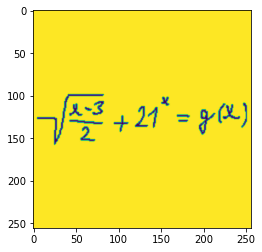

In [6]:
import matplotlib.pyplot as plt
plt.imshow(images[16])



In [7]:
tf.data.Dataset.list_files(image_dir)

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

# imagedataGenrator

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
image_dir ='F:/INTERNSHIP 8 SEM/archive/data/train/'
image_dir

'F:/INTERNSHIP 8 SEM/archive/data/train/'

In [2]:
datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.99)
datagen


In [3]:
# Load the training data
train_data = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(256, 256),
    class_mode='binary',
    batch_size=32,
    subset='training'
)
 # Load the validation data
val_data = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(256, 256),
    class_mode='binary',
    batch_size=32,
    subset='validation'
)
 

Found 91 images belonging to 6 classes.
Found 8744 images belonging to 6 classes.


In [10]:
train_data

In [13]:
train_data.__len__()

3

In [14]:
#build cnn model 

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 50,
                          kernel_size = 5,
                          activation = "relu",
                          input_shape=(256,256,1)),
    tf.keras.layers.Conv2D(filters = 50,
                           kernel_size = 5,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                            padding = "valid"),
    tf.keras.layers.Conv2D(30,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(30,kernel_size=3,activation= "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation = "sigmoid")
    
])
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [12]:
fit = model.fit(train_data,epochs=2,verbose=1,shuffle=True,steps_per_epoch=len(train_data), validation_data=val_data)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\kamal\anaconda1\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 252, 252, 50)      1300      
                                                                 
 conv2d_9 (Conv2D)           (None, 248, 248, 50)      62550     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 50)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 122, 122, 30)      13530     
                                                                 
 conv2d_11 (Conv2D)          (None, 120, 120, 30)      8130      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 60, 60, 30)       0         
 2D)                                                  

In [9]:
import torch
print(torch.cuda.is_available())


False


In [ ]:
len(train_data)

In [ ]:

1769/32


In [ ]:
import pytesseract


In [ ]:
import subprocess
import tempfile
from sympy import *

# Path to the image
image_path = "F:/INTERNSHIP 8 SEM/archive/data/train/MfrDB/MfrDB3522.png"

# Use Tesseract OCR to extract the text from the image
with tempfile.NamedTemporaryFile(suffix=".txt") as text_file:
    subprocess.call(["tesseract", image_path, text_file.name[:-4]])
    with open(text_file.name, "r") as f:
        text = f.read()

# Use SymPy to parse the text and generate a LaTeX representation of the formula
x, y = symbols('x y')
formula = parse_expr(text)
latex = latex(formula)

print(latex) 

In [ ]:
use_cuda = torch.cuda.is_available()
use_cuda

In [ ]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [ ]:
img = cv2.imread('')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img))
cv2.imshow('result',img)
cv2.waitKey(0)

In [ ]:
import numpy as np
image = np.load("F:/INTERNSHIP 8 SEM/archive/data/train/MfrDB/MfrDB3522.png")

In [ ]:
ig = Image.fromarray(image)
ig

In [ ]:
print(image)/255

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
import easyocr
import matplotlib.pyplot as plt

In [ ]:
np_array = np.load()

In [ ]:
reader = easyocr.Reader(['en'],gpu = False)
result = reader.readtext(plt.imshow(ig))
result         

# perspective  correction

In [ ]:
import cv2                
import matplotlib.pyplot as plt
import numpy as np                      

In [ ]:
im = cv2.imread('F:/INTERNSHIP 8 SEM/archive/data/train/MfrDB/MfrDB3522.png')
im.shape

In [ ]:
rows,cols,ch = im.shape

In [ ]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])

# define the corresponding four points on output image
pts2 = np.float32([[100,50],[300,0],[0,300],[300,300]])

# get the perspective transform matrix
M = cv2.getPerspectiveTransform(pts1,pts2)

In [ ]:
dst = cv2.warpPerspective(im,M,(cols,rows))

In [ ]:
plt.imshow(dst, cmap = 'gray', interpolation = 'bicubic')
cv2.imshow('transformed img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
pip install cv2

In [ ]:
sudo apt-get install libqt4-dev
cmake -D WITH_QT=ON ..
make
sudo make install

In [ ]:
pip install opencv-contrib-python


In [ ]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
